# BÀI THỰC HÀNH: LINEAR REGRESSION

Họ tên sinh viên: Bùi Quang Chiến

MSSV: 23001837

## Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

# Cài đặt hiển thị
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')
%matplotlib inline

## BÀI 1: DỰ ĐOÁN GPA DỰA TRÊN ĐIỂM SAT

### 1.1. Đọc và khám phá dữ liệu SAT_GPA

In [2]:
# Đọc dữ liệu từ file CSV
df_sat = pd.read_csv('SAT_GPA - SAT_GPA.csv')

# Hiển thị thông tin cơ bản
print("Thông tin dữ liệu:")
print(df_sat.info())
print("\n5 dòng đầu tiên:")
print(df_sat.head())
print("\nThống kê mô tả:")
print(df_sat.describe())

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB
None

5 dòng đầu tiên:
    SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54
3  1685  2.74
4  1693  2.83

Thống kê mô tả:
               SAT        GPA
count    84.000000  84.000000
mean   1845.273810   3.330238
std     104.530661   0.271617
min    1634.000000   2.400000
25%    1772.000000   3.190000
50%    1846.000000   3.380000
75%    1934.000000   3.502500
max    2050.000000   3.810000


In [3]:
# Kiểm tra giá trị thiếu
print("Số lượng giá trị thiếu:")
print(df_sat.isnull().sum())

# Xử lý dữ liệu nếu cần (loại bỏ giá trị thiếu hoặc điền giá trị)
df_sat = df_sat.dropna()

Số lượng giá trị thiếu:
SAT    0
GPA    0
dtype: int64


### 1.2. Trực quan hóa mối quan hệ giữa SAT và GPA

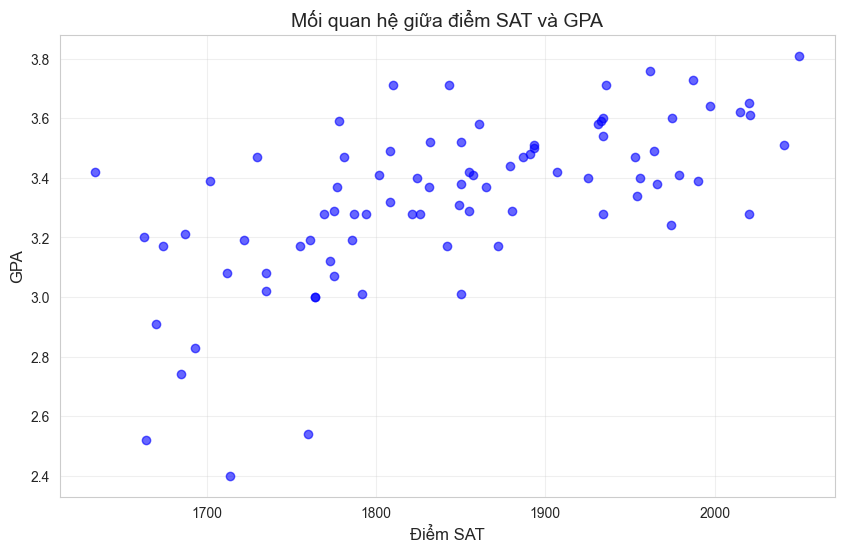

Hệ số tương quan giữa SAT và GPA: 0.6372


In [4]:
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_sat['SAT'], df_sat['GPA'], alpha=0.6, color='blue')
plt.xlabel('Điểm SAT', fontsize=12)
plt.ylabel('GPA', fontsize=12)
plt.title('Mối quan hệ giữa điểm SAT và GPA', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# Tính hệ số tương quan
correlation = df_sat['SAT'].corr(df_sat['GPA'])
print(f"Hệ số tương quan giữa SAT và GPA: {correlation:.4f}")

### 1.3. Xây dựng mô hình Linear Regression

In [5]:
# Chuẩn bị dữ liệu
X = df_sat[['SAT']].values  # Biến độc lập (features)
y = df_sat['GPA'].values     # Biến phụ thuộc (target)

# Chia dữ liệu thành tập train và test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Kích thước tập train: {X_train.shape[0]} mẫu")
print(f"Kích thước tập test: {X_test.shape[0]} mẫu")

Kích thước tập train: 67 mẫu
Kích thước tập test: 17 mẫu


In [6]:
# Khởi tạo và huấn luyện mô hình
model_sat = LinearRegression()
model_sat.fit(X_train, y_train)

# In ra các tham số của mô hình
print("Tham số của mô hình:")
print(f"Hệ số góc (coefficient): {model_sat.coef_[0]:.6f}")
print(f"Hệ số chặn (intercept): {model_sat.intercept_:.6f}")
print(f"\nPhương trình hồi quy: GPA = {model_sat.coef_[0]:.6f} * SAT + {model_sat.intercept_:.6f}")

Tham số của mô hình:
Hệ số góc (coefficient): 0.001469
Hệ số chặn (intercept): 0.625862

Phương trình hồi quy: GPA = 0.001469 * SAT + 0.625862


### 1.4. Đánh giá mô hình

In [7]:
# Dự đoán trên tập train và test
y_train_pred = model_sat.predict(X_train)
y_test_pred = model_sat.predict(X_test)

# Tính các chỉ số đánh giá
print("=" * 50)
print("KẾT QUẢ TRÊN TẬP TRAIN:")
print("=" * 50)
print(f"R² Score: {r2_score(y_train, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_train_pred):.4f}")

print("\n" + "=" * 50)
print("KẾT QUẢ TRÊN TẬP TEST:")
print("=" * 50)
print(f"R² Score: {r2_score(y_test, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_test_pred):.4f}")

KẾT QUẢ TRÊN TẬP TRAIN:
R² Score: 0.3687
Mean Squared Error (MSE): 0.0415
Root Mean Squared Error (RMSE): 0.2037
Mean Absolute Error (MAE): 0.1532

KẾT QUẢ TRÊN TẬP TEST:
R² Score: 0.4695
Mean Squared Error (MSE): 0.0525
Root Mean Squared Error (RMSE): 0.2291
Mean Absolute Error (MAE): 0.1627


### 1.5. Trực quan hóa kết quả

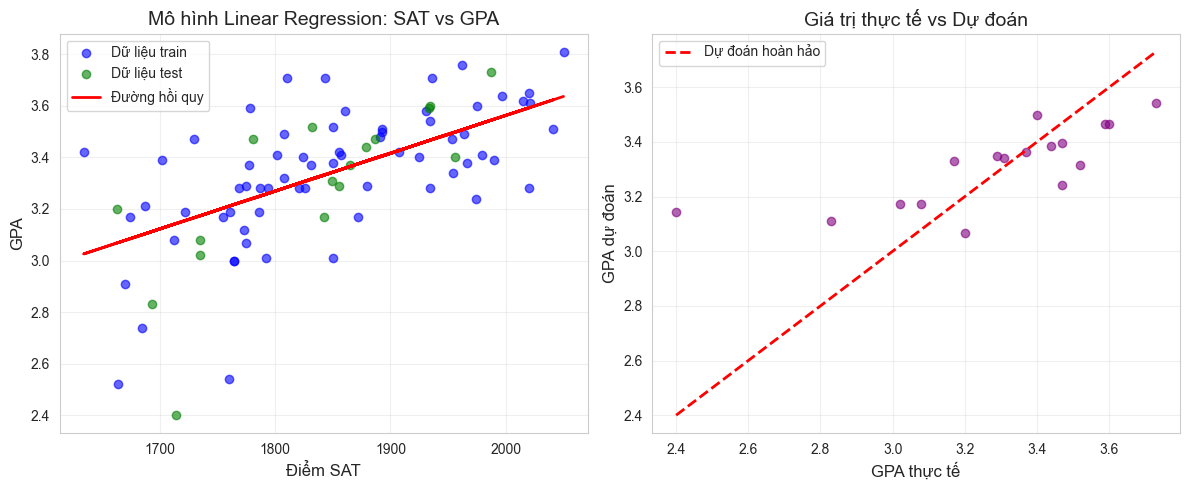

In [8]:
# Vẽ đường hồi quy
plt.figure(figsize=(12, 5))

# Subplot 1: Dữ liệu và đường hồi quy
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.6, color='blue', label='Dữ liệu train')
plt.scatter(X_test, y_test, alpha=0.6, color='green', label='Dữ liệu test')
plt.plot(X, model_sat.predict(X), color='red', linewidth=2, label='Đường hồi quy')
plt.xlabel('Điểm SAT', fontsize=12)
plt.ylabel('GPA', fontsize=12)
plt.title('Mô hình Linear Regression: SAT vs GPA', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Giá trị thực tế vs Giá trị dự đoán
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Dự đoán hoàn hảo')
plt.xlabel('GPA thực tế', fontsize=12)
plt.ylabel('GPA dự đoán', fontsize=12)
plt.title('Giá trị thực tế vs Dự đoán', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 1.6. Dự đoán với dữ liệu mới

In [ ]:
# Dự đoán GPA cho các điểm SAT mới
new_sat_scores = np.array([[1700], [1800], [1900], [2000]])
predicted_gpa = model_sat.predict(new_sat_scores)

print("DỰ ĐOÁN GPA CHO ĐIỂM SAT MỚI:")
print("=" * 40)
for sat, gpa in zip(new_sat_scores.flatten(), predicted_gpa):
    print(f"Điểm SAT: {sat} → GPA dự đoán: {gpa:.2f}")

## BÀI 2: DỰ ĐOÁN CHỈ SỐ SỨC KHỎE (BEDAYNTM) 

### 2.1. Đọc và khám phá dữ liệu từ vidu4_lin_reg.txt

In [9]:
# Đọc dữ liệu từ file txt (dạng space-separated)
df_health = pd.read_csv('vidu4_lin_reg.txt', sep='\s+', engine='python')

# Hiển thị thông tin cơ bản
print("Thông tin dữ liệu:")
print(df_health.info())
print("\n5 dòng đầu tiên:")
print(df_health.head())
print("\nThống kê mô tả:")
print(df_health.describe())

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           100 non-null    int64  
 1   TUOI         100 non-null    int64  
 2   BMI          100 non-null    int64  
 3   HA           100 non-null    int64  
 4   GLUCOSE      100 non-null    float64
 5   CHOLESTEROL  100 non-null    float64
 6   BEDAYNTM     100 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 5.6 KB
None

5 dòng đầu tiên:
   ID  TUOI  BMI   HA  GLUCOSE  CHOLESTEROL  BEDAYNTM
0   1    56   21  160     14.0         6.00      1.95
1   2    76   18  150     12.0         4.97      1.33
2   3    63   16  160      4.4         6.39      0.83
3   4    78   20  100      4.0         7.00      2.00
4   5    87   20  110      4.6         4.10      1.30

Thống kê mô tả:
               ID        TUOI         BMI          HA     GLUCOSE  \
count  100.000000

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\brave\AppData\Local\Temp\ipykernel_16212\680293822.py:2: SyntaxWarning: invalid escape sequence '\s'
  df_health = pd.read_csv('vidu4_lin_reg.txt', sep='\s+', engine='python')


In [10]:
# Kiểm tra giá trị thiếu
print("Số lượng giá trị thiếu:")
print(df_health.isnull().sum())

# Kiểm tra thông tin các cột
print("\nTên các cột:")
print(df_health.columns.tolist())

Số lượng giá trị thiếu:
ID             0
TUOI           0
BMI            0
HA             0
GLUCOSE        0
CHOLESTEROL    0
BEDAYNTM       0
dtype: int64

Tên các cột:
['ID', 'TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL', 'BEDAYNTM']


### 2.2. Phân tích tương quan giữa các biến

Ma trận tương quan:
                   ID      TUOI       BMI        HA   GLUCOSE  CHOLESTEROL  \
ID           1.000000 -0.145946  0.022255  0.049970 -0.100662    -0.000882   
TUOI        -0.145946  1.000000 -0.012622 -0.057426  0.119200     0.163704   
BMI          0.022255 -0.012622  1.000000  0.056349 -0.021540     0.216369   
HA           0.049970 -0.057426  0.056349  1.000000  0.018960     0.132585   
GLUCOSE     -0.100662  0.119200 -0.021540  0.018960  1.000000     0.080749   
CHOLESTEROL -0.000882  0.163704  0.216369  0.132585  0.080749     1.000000   
BEDAYNTM     0.032419  0.407849  0.027143  0.106958  0.139807     0.218618   

             BEDAYNTM  
ID           0.032419  
TUOI         0.407849  
BMI          0.027143  
HA           0.106958  
GLUCOSE      0.139807  
CHOLESTEROL  0.218618  
BEDAYNTM     1.000000  


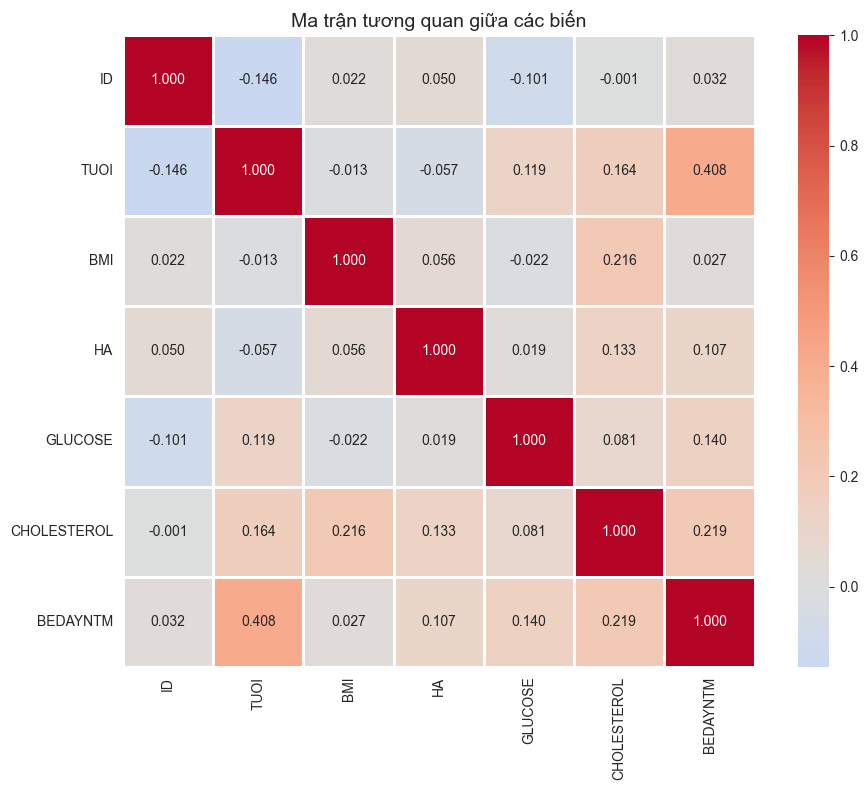


Tương quan với BEDAYNTM:
BEDAYNTM       1.000000
TUOI           0.407849
CHOLESTEROL    0.218618
GLUCOSE        0.139807
HA             0.106958
ID             0.032419
BMI            0.027143
Name: BEDAYNTM, dtype: float64


In [11]:
# Ma trận tương quan
correlation_matrix = df_health.corr()
print("Ma trận tương quan:")
print(correlation_matrix)

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.3f')
plt.title('Ma trận tương quan giữa các biến', fontsize=14)
plt.tight_layout()
plt.show()

# Tương quan với biến mục tiêu BEDAYNTM
print("\nTương quan với BEDAYNTM:")
print(correlation_matrix['BEDAYNTM'].sort_values(ascending=False))

### 2.3. Xây dựng mô hình Simple Linear Regression (1 biến)

In [12]:
# Chọn biến có tương quan cao nhất với BEDAYNTM (ví dụ: GLUCOSE)
# Bạn có thể thay đổi biến này dựa trên kết quả phân tích tương quan

feature_name = 'GLUCOSE'  # Thay đổi biến này nếu cần

X_simple = df_health[[feature_name]].values
y_health = df_health['BEDAYNTM'].values

# Chia dữ liệu train/test
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y_health, test_size=0.2, random_state=42
)

# Huấn luyện mô hình
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

print(f"MÔ HÌNH ĐƠN GIẢN: {feature_name} → BEDAYNTM")
print("=" * 50)
print(f"Hệ số góc: {model_simple.coef_[0]:.6f}")
print(f"Hệ số chặn: {model_simple.intercept_:.6f}")
print(f"Phương trình: BEDAYNTM = {model_simple.coef_[0]:.6f} * {feature_name} + {model_simple.intercept_:.6f}")

MÔ HÌNH ĐƠN GIẢN: GLUCOSE → BEDAYNTM
Hệ số góc: 0.014227
Hệ số chặn: 0.954100
Phương trình: BEDAYNTM = 0.014227 * GLUCOSE + 0.954100


In [13]:
# Đánh giá mô hình simple
y_pred_simple = model_simple.predict(X_test_s)

print("\nKẾT QUẢ MÔ HÌNH ĐƠN GIẢN:")
print("=" * 50)
print(f"R² Score: {r2_score(y_test_s, y_pred_simple):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_s, y_pred_simple)):.4f}")
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_simple):.4f}")


KẾT QUẢ MÔ HÌNH ĐƠN GIẢN:
R² Score: -0.0431
RMSE: 0.4924
MAE: 0.3345


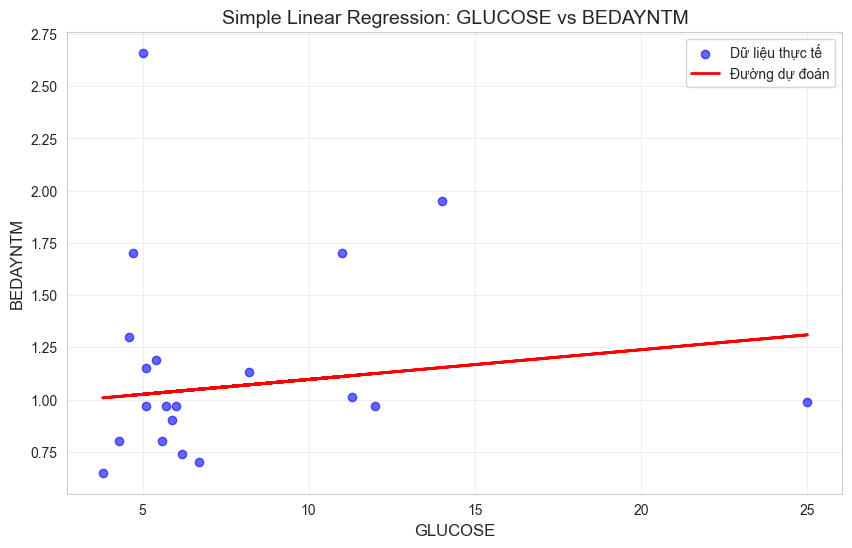

In [14]:
# Trực quan hóa
plt.figure(figsize=(10, 6))
plt.scatter(X_test_s, y_test_s, alpha=0.6, color='blue', label='Dữ liệu thực tế')
plt.plot(X_test_s, y_pred_simple, color='red', linewidth=2, label='Đường dự đoán')
plt.xlabel(feature_name, fontsize=12)
plt.ylabel('BEDAYNTM', fontsize=12)
plt.title(f'Simple Linear Regression: {feature_name} vs BEDAYNTM', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 2.4. Xây dựng mô hình Multiple Linear Regression (nhiều biến)

In [15]:
# Sử dụng tất cả các biến độc lập (trừ ID và BEDAYNTM)
features = ['TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL']

X_multiple = df_health[features].values
y_health = df_health['BEDAYNTM'].values

# Chia dữ liệu train/test
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multiple, y_health, test_size=0.2, random_state=42
)

# Huấn luyện mô hình
model_multiple = LinearRegression()
model_multiple.fit(X_train_m, y_train_m)

print("MÔ HÌNH MULTIPLE LINEAR REGRESSION")
print("=" * 50)
print("Hệ số các biến:")
for feature, coef in zip(features, model_multiple.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"\nHệ số chặn: {model_multiple.intercept_:.6f}")

# Tạo phương trình
equation = "BEDAYNTM = "
for feature, coef in zip(features, model_multiple.coef_):
    equation += f"{coef:.4f}*{feature} + "
equation += f"{model_multiple.intercept_:.4f}"
print(f"\nPhương trình:\n{equation}")

MÔ HÌNH MULTIPLE LINEAR REGRESSION
Hệ số các biến:
  TUOI: 0.008213
  BMI: 0.000171
  HA: 0.001920
  GLUCOSE: 0.006449
  CHOLESTEROL: 0.033670

Hệ số chặn: 0.038628

Phương trình:
BEDAYNTM = 0.0082*TUOI + 0.0002*BMI + 0.0019*HA + 0.0064*GLUCOSE + 0.0337*CHOLESTEROL + 0.0386


In [16]:
# Đánh giá mô hình multiple
y_train_pred_m = model_multiple.predict(X_train_m)
y_test_pred_m = model_multiple.predict(X_test_m)

print("KẾT QUẢ MÔ HÌNH MULTIPLE LINEAR REGRESSION")
print("=" * 50)
print("TRÊN TẬP TRAIN:")
print(f"  R² Score: {r2_score(y_train_m, y_train_pred_m):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train_m, y_train_pred_m)):.4f}")
print(f"  MAE: {mean_absolute_error(y_train_m, y_train_pred_m):.4f}")

print("\nTRÊN TẬP TEST:")
print(f"  R² Score: {r2_score(y_test_m, y_test_pred_m):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_m, y_test_pred_m)):.4f}")
print(f"  MAE: {mean_absolute_error(y_test_m, y_test_pred_m):.4f}")

KẾT QUẢ MÔ HÌNH MULTIPLE LINEAR REGRESSION
TRÊN TẬP TRAIN:
  R² Score: 0.1711
  RMSE: 0.3420
  MAE: 0.2367

TRÊN TẬP TEST:
  R² Score: 0.2321
  RMSE: 0.4225
  MAE: 0.2425


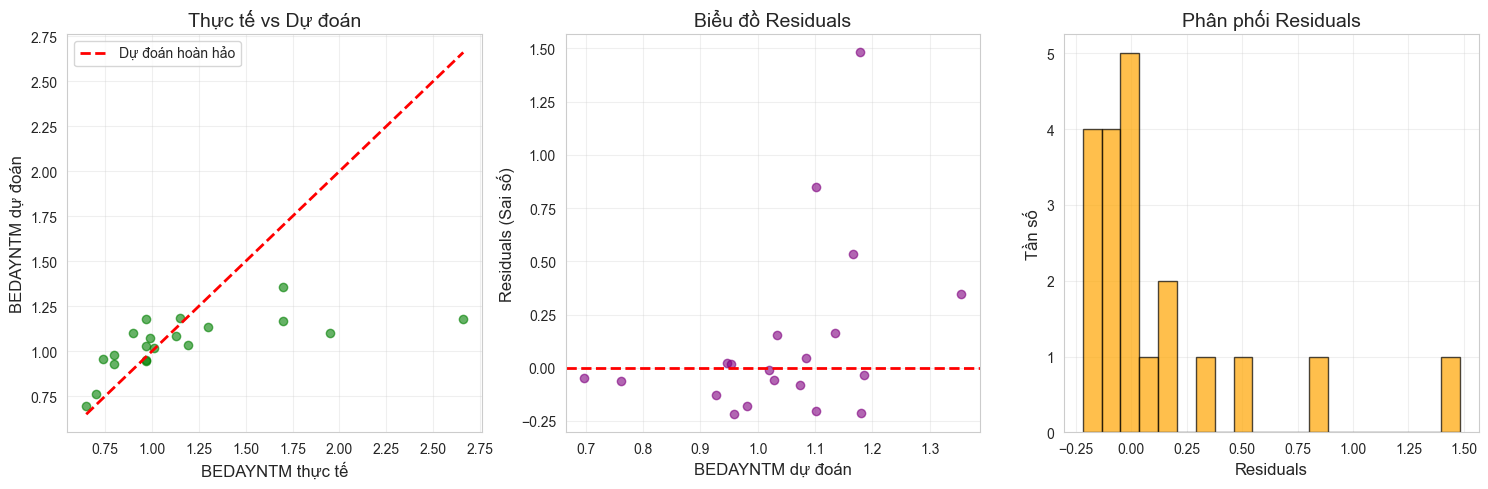

In [17]:
# Trực quan hóa kết quả
plt.figure(figsize=(15, 5))

# Subplot 1: Giá trị thực tế vs Dự đoán
plt.subplot(1, 3, 1)
plt.scatter(y_test_m, y_test_pred_m, alpha=0.6, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 
         'r--', linewidth=2, label='Dự đoán hoàn hảo')
plt.xlabel('BEDAYNTM thực tế', fontsize=12)
plt.ylabel('BEDAYNTM dự đoán', fontsize=12)
plt.title('Thực tế vs Dự đoán', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Residuals (Sai số)
plt.subplot(1, 3, 2)
residuals = y_test_m - y_test_pred_m
plt.scatter(y_test_pred_m, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('BEDAYNTM dự đoán', fontsize=12)
plt.ylabel('Residuals (Sai số)', fontsize=12)
plt.title('Biểu đồ Residuals', fontsize=14)
plt.grid(True, alpha=0.3)

# Subplot 3: Phân phối Residuals
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Tần số', fontsize=12)
plt.title('Phân phối Residuals', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.5. So sánh mô hình Simple vs Multiple


SO SÁNH HIỆU SUẤT CÁC MÔ HÌNH:
                   Mô hình  R² Score     RMSE      MAE
  Simple Linear Regression -0.043087 0.492428 0.334490
Multiple Linear Regression  0.232091 0.422510 0.242537



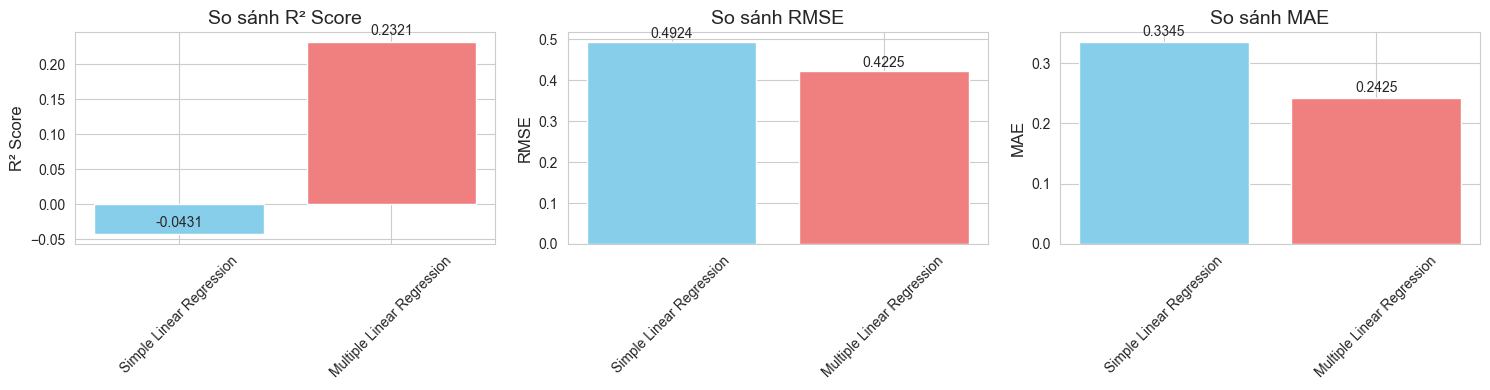

In [20]:
# So sánh hiệu suất
comparison_data = {
    'Mô hình': ['Simple Linear Regression', 'Multiple Linear Regression'],
    'R² Score': [
        r2_score(y_test_s, y_pred_simple),
        r2_score(y_test_m, y_test_pred_m)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test_s, y_pred_simple)),
        np.sqrt(mean_squared_error(y_test_m, y_test_pred_m))
    ],
    'MAE': [
        mean_absolute_error(y_test_s, y_pred_simple),
        mean_absolute_error(y_test_m, y_test_pred_m)
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print("\nSO SÁNH HIỆU SUẤT CÁC MÔ HÌNH:")
print("=" * 70)
print(df_comparison.to_string(index=False))
print("\n" + "=" * 70)

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

metrics = ['R² Score', 'RMSE', 'MAE']
colors = ['skyblue', 'lightcoral']

for i, metric in enumerate(metrics):
    axes[i].bar(df_comparison['Mô hình'], df_comparison[metric], color=colors)
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].set_title(f'So sánh {metric}', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)
    for j, v in enumerate(df_comparison[metric]):
        axes[i].text(j, v + 0.01, f'{v:.4f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

### 2.6. Dự đoán với dữ liệu mới

In [19]:
# Tạo dữ liệu mẫu để dự đoán
new_patient = pd.DataFrame({
    'TUOI': [65],
    'BMI': [23],
    'HA': [140],
    'GLUCOSE': [6.5],
    'CHOLESTEROL': [5.5]
})

predicted_bedayntm = model_multiple.predict(new_patient[features])

print("DỰ ĐOÁN CHO BỆNH NHÂN MỚI:")
print("=" * 50)
print("Thông tin bệnh nhân:")
for col in features:
    print(f"  {col}: {new_patient[col].values[0]}")
print(f"\nBEDAYNTM dự đoán: {predicted_bedayntm[0]:.4f}")

DỰ ĐOÁN CHO BỆNH NHÂN MỚI:
Thông tin bệnh nhân:
  TUOI: 65
  BMI: 23
  HA: 140
  GLUCOSE: 6.5
  CHOLESTEROL: 5.5

BEDAYNTM dự đoán: 1.0723


b:\EnvironmentDev\Python\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## BÀI 3: PHÂN TÍCH VÀ KẾT LUẬN

### 3.1. Đánh giá các mô hình

**Nhận xét về mô hình SAT - GPA:**

1. Hệ số tương quan giữa SAT và GPA: [Điền kết quả]
2. R² Score của mô hình: [Điền kết quả]
3. Mô hình có khả năng dự đoán tốt hay không? Tại sao?
   - [Viết phân tích của bạn]

**Nhận xét về mô hình dự đoán BEDAYNTM:**

1. Biến nào có tương quan mạnh nhất với BEDAYNTM?
   - [Điền kết quả]
2. So sánh Simple Linear Regression vs Multiple Linear Regression:
   - Mô hình nào tốt hơn? Tại sao?
   - [Viết phân tích của bạn]
3. Có dấu hiệu overfitting hay underfitting không?
   - [Viết phân tích của bạn]

### 3.2. Kiểm tra giả thiết của Linear Regression

KIỂM TRA GIẢ THIẾT CỦA LINEAR REGRESSION
Shapiro-Wilk Test:
  Statistic: 0.7251
  P-value: 0.0001
  → Residuals không có phân phối chuẩn (p ≤ 0.05)


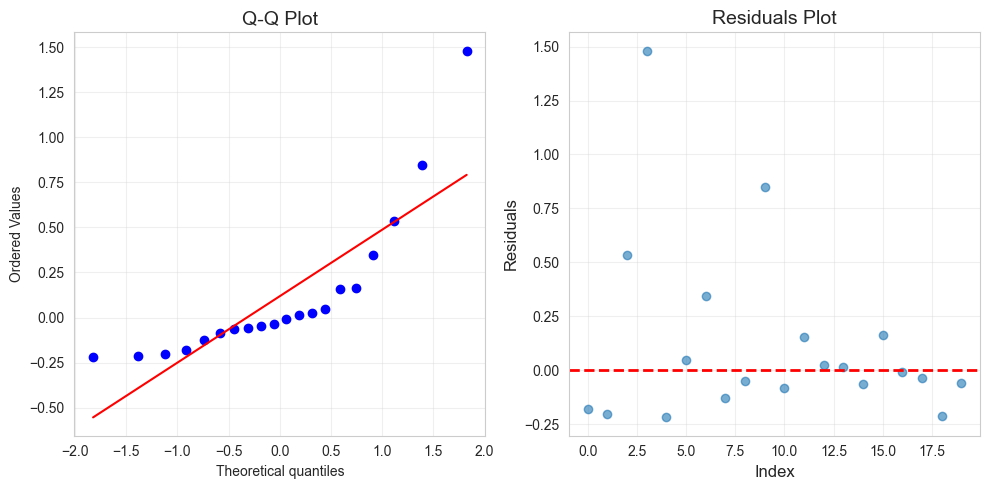

In [18]:
# Kiểm tra tính tuyến tính và phân phối chuẩn của residuals
from scipy import stats

residuals_m = y_test_m - y_test_pred_m

# Test Shapiro-Wilk để kiểm tra phân phối chuẩn
statistic, p_value = stats.shapiro(residuals_m)
print("KIỂM TRA GIẢ THIẾT CỦA LINEAR REGRESSION")
print("=" * 50)
print(f"Shapiro-Wilk Test:")
print(f"  Statistic: {statistic:.4f}")
print(f"  P-value: {p_value:.4f}")
if p_value > 0.05:
    print("  → Residuals có phân phối chuẩn (p > 0.05)")
else:
    print("  → Residuals không có phân phối chuẩn (p ≤ 0.05)")

# Q-Q plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
stats.probplot(residuals_m, dist="norm", plot=plt)
plt.title('Q-Q Plot', fontsize=14)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(range(len(residuals_m)), residuals_m, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals Plot', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()